In [74]:
# Imports
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
# Data
loan_df = pd.read_csv('loan_data.csv')

In [76]:
# Data Exploration
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [77]:
loan_df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [80]:
loan_df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [78]:
X = loan_df.drop(columns=['loan_status'])
y = loan_df['loan_status']
plot_df = pd.concat([X, y], axis=1)
plot_df_sample = plot_df.sample(n=1000, random_state=42) # Otherwise it takes forever to graph

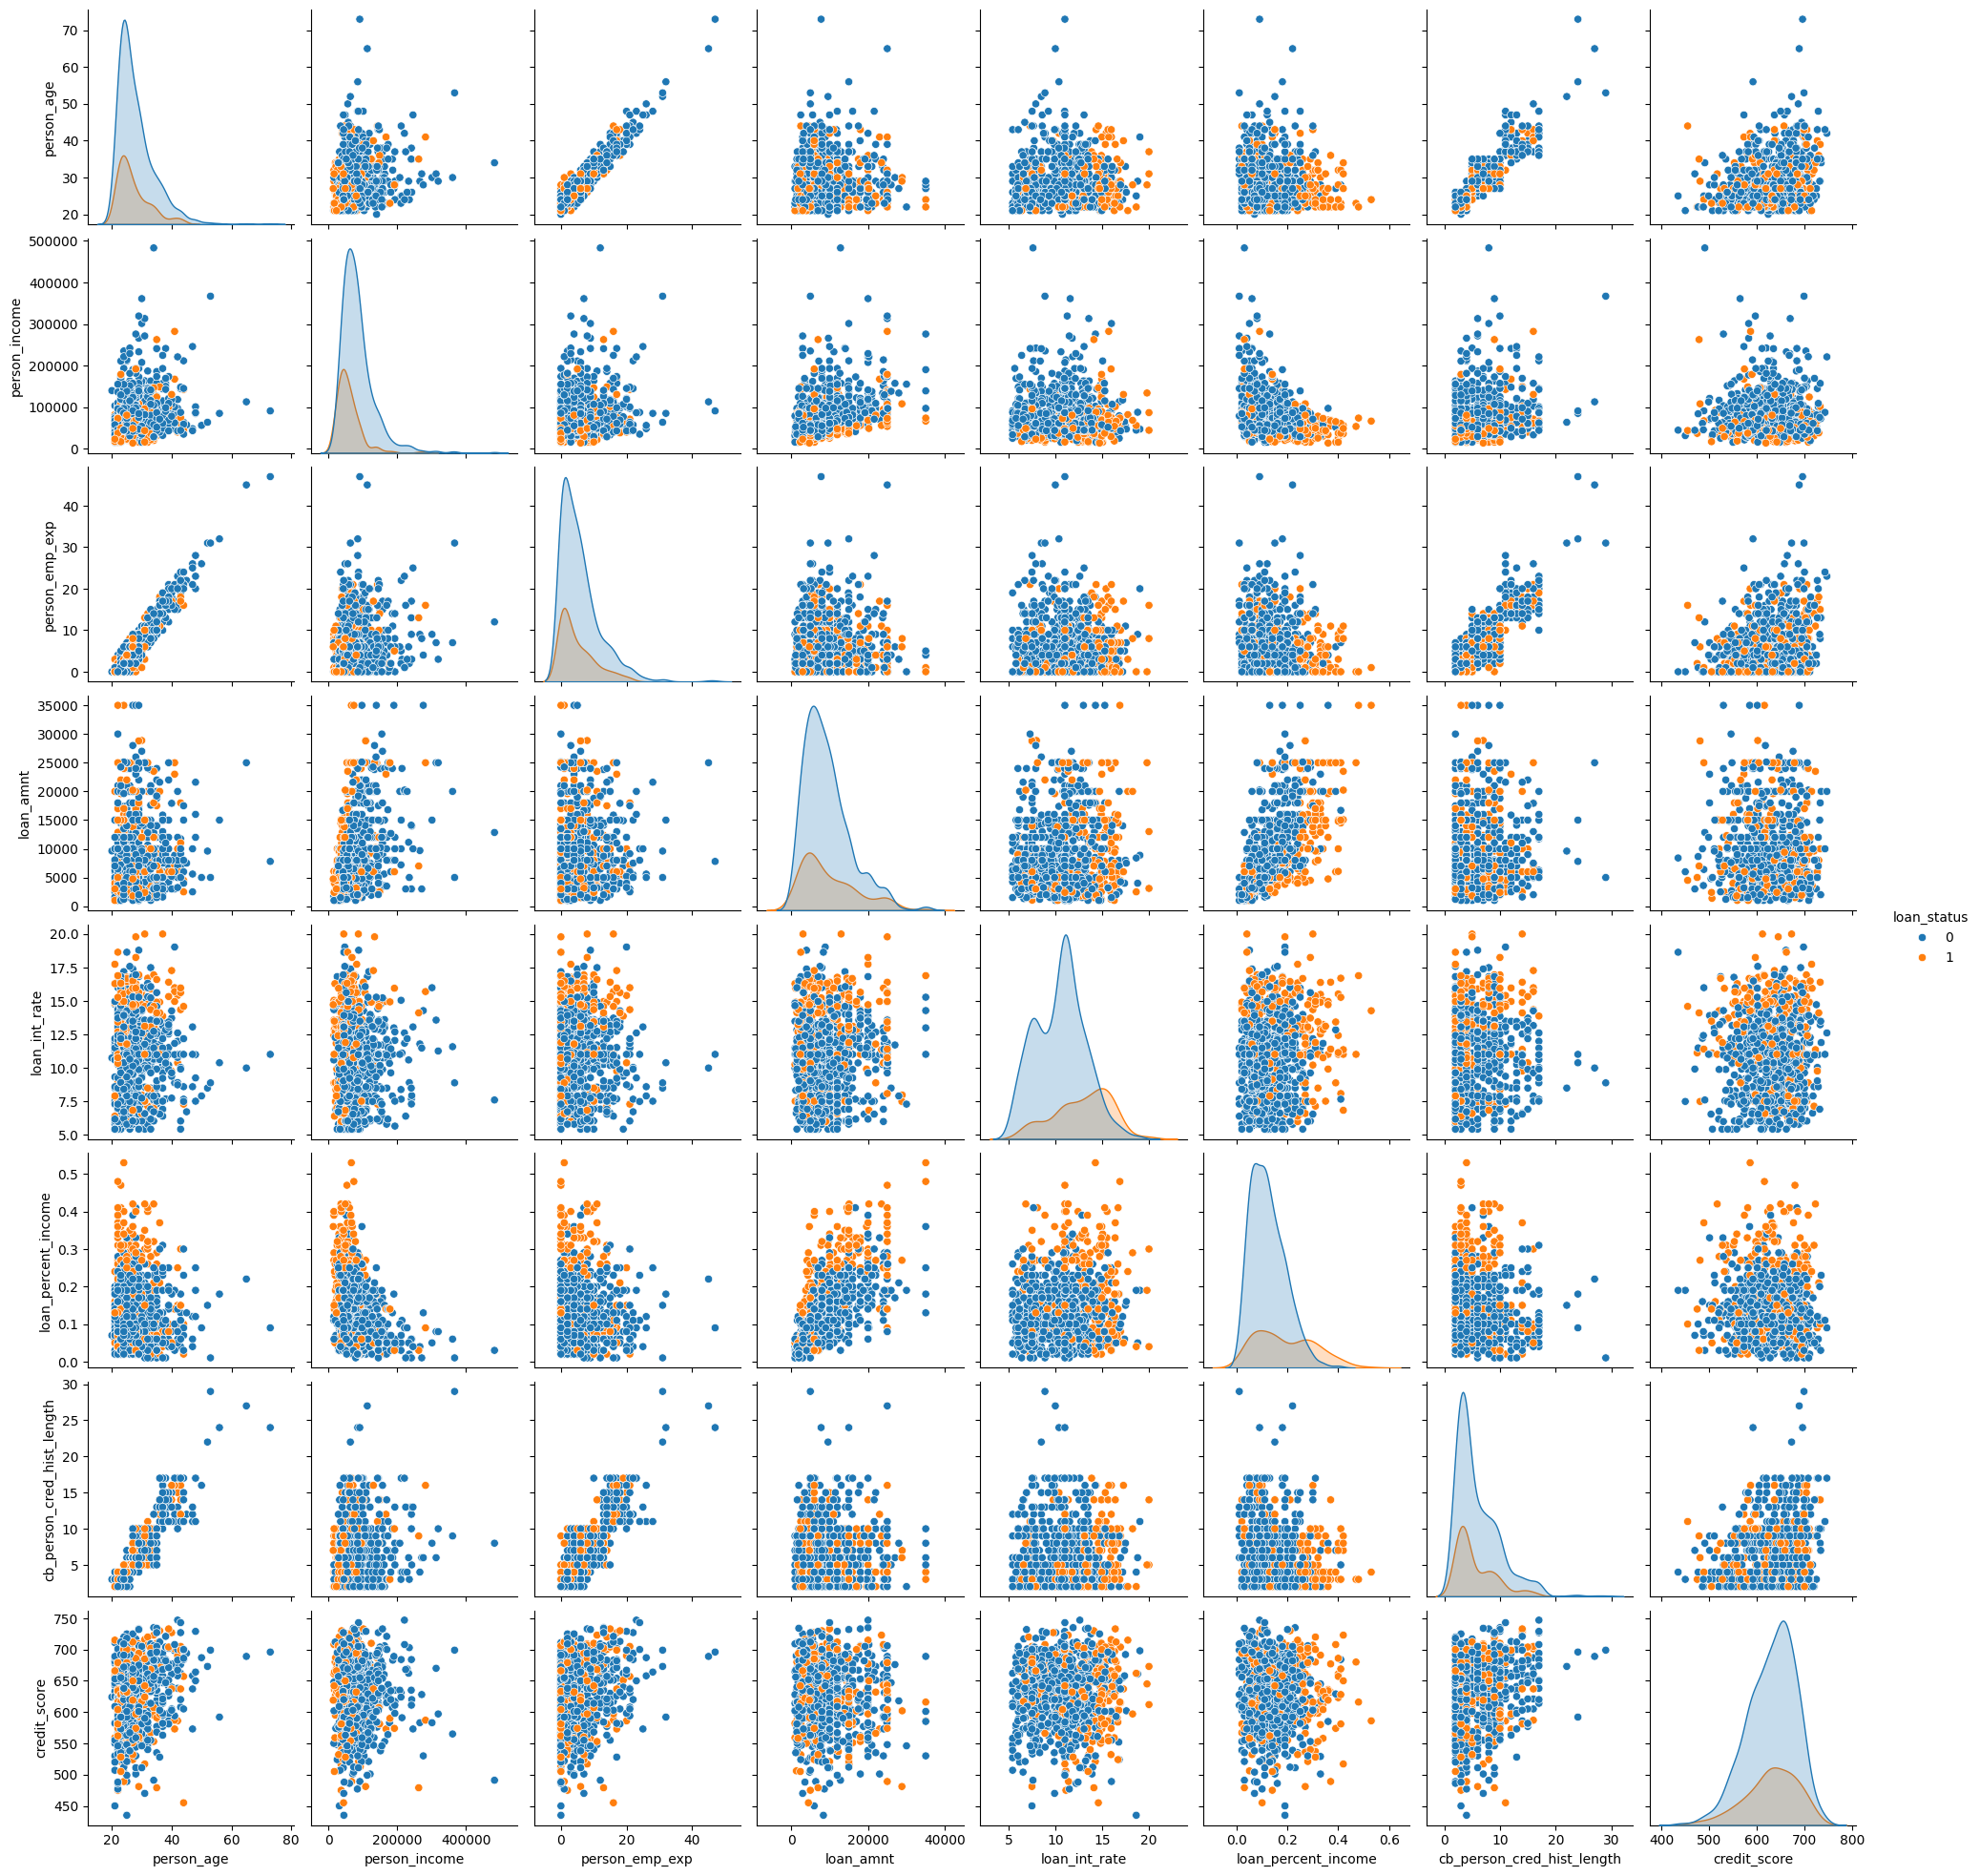

In [79]:
import seaborn as sns
from seaborn import pairplot
pairplot(plot_df_sample, hue='loan_status');

([<matplotlib.axis.XTick at 0x793651c9ca60>,
 [Text(0, 0, 'Denied (0)'), Text(1, 0, 'Approved (1)')])

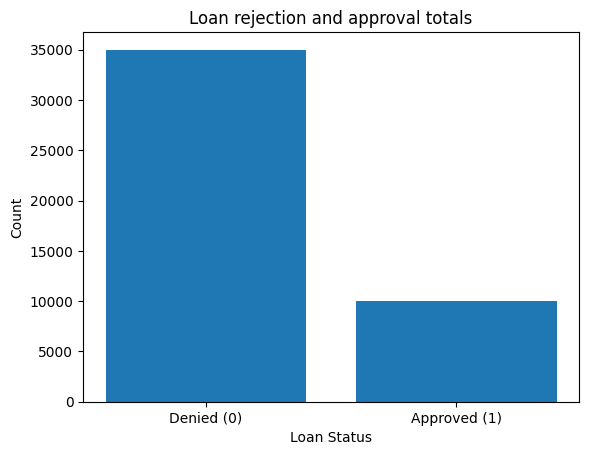

In [94]:
loan_status_counts = loan_df['loan_status'].value_counts()
plt.bar(loan_status_counts.index, loan_status_counts.values)
plt.title('Loan rejection and approval totals')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(loan_status_counts.index, ['Denied (0)', 'Approved (1)'])

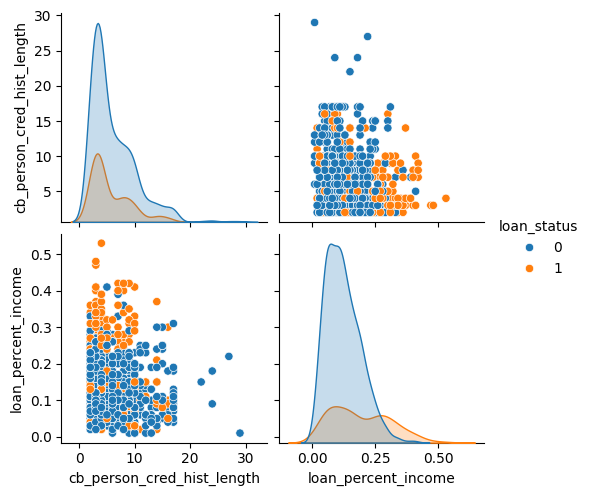

In [100]:
columns_to_plot = ['cb_person_cred_hist_length', 'loan_percent_income', 'loan_status']
plot_df_subset = plot_df_sample[columns_to_plot]
sns.pairplot(plot_df_subset, hue='loan_status')